<div >
    <img src = "../banner/banner_ML_UNLP_1900_200.png" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/ML_UNLP_Lectures/blob/main/Week01/Notebook_SS01_CE.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



# Predicting Wages

Our objective today is to construct a model of individual wages

$$
w = f(X) + u 
$$

where w is the  wage, and X is a matrix that includes potential explanatory variables/predictors. In this problem set, we will focus on a linear model of the form

\begin{align}
 ln(w) & = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p  + u 
\end{align}

were $ln(w)$ is the logarithm of the wage.

To illustrate I'm going to use a sample of the NLSY97. The NLSY97 is  a nationally representative sample of 8,984 men and women born during the years 1980 through 1984 and living in the United States at the time of the initial survey in 1997.  Participants were ages 12 to 16 as of December 31, 1996.  Interviews were conducted annually from 1997 to 2011 and biennially since then.  

Let's load the modules 

In [7]:
%matplotlib inline

# import some useful packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')




and the data set:

In [8]:
nlsy=pd.read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/nlsy97.csv')

In [9]:
nlsy.head()

,lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,...,_XPexp_13,_XPexp_14,_XPexp_16,_XPexp_17,_XPexp_18,_XPexp_19,_XPexp_20,_XPexp_21,_XPexp_22,_XPexp_23
0,4.076898,16,0,0,0,11,7.0724,12,12,3,...,0,0,0,0,0,0,0,0,0,0
1,3.294138,9,0,0,0,19,4.7481,9,10,2,...,0,0,0,0,0,1,0,0,0,0
2,2.830896,9,0,1,0,22,1.1987,12,9,3,...,0,0,0,0,0,0,0,0,1,0
3,4.306459,16,0,0,0,13,8.9321,16,18,2,...,1,0,0,0,0,0,0,0,0,0
4,5.991465,16,0,1,0,15,2.2618,16,16,1,...,0,0,0,0,0,0,0,0,0,0


## Regresión Lineal: log(salario) en polinomios de educación

In [10]:
# generate dictionary of transformations of education
powerlist=[nlsy['educ']**j for j in np.arange(1,10)]
X=pd.concat(powerlist,axis=1)
X.columns = ['educ'+str(j) for j in np.arange(1,10)]

X0 = X.copy()

### Corremos la regresión

In [11]:
# run least squares regression
# instantiate and fit our regression object:
reg= LinearRegression().fit(X,nlsy['lnw_2016'])

In [12]:
print(reg.coef_) #ver los resultados

[ 3.89512192e+01  1.17854110e+02 -4.54349825e+01  8.01163012e+00
 -8.16088311e-01  5.09460977e-02 -1.92937821e-03  4.07948786e-05
 -3.70125250e-07]


In [13]:
from statsmodels.formula.api import ols

db1 = pd.DataFrame(X)
db1.loc[:, 'lnw_2016'] = nlsy['lnw_2016']

In [14]:
db1.head()

,educ1,educ2,educ3,educ4,educ5,educ6,educ7,educ8,educ9,lnw_2016
0,16,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,4.076898
1,9,81,729,6561,59049,531441,4782969,43046721,387420489,3.294138
2,9,81,729,6561,59049,531441,4782969,43046721,387420489,2.830896
3,16,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,4.306459
4,16,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,5.991465


In [15]:
reg_statsmodels = ols("lnw_2016~educ1+educ2+educ3+educ4+educ5+educ6+educ7+educ8+educ9", data = db1).fit()
print(reg_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               lnw_2016   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     14.20
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           7.63e-18
Time:                        18:15:17   Log-Likelihood:                -1570.3
No. Observations:                1266   AIC:                             3157.
Df Residuals:                    1258   BIC:                             3198.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0046      0.870      2.305      0.0

## Predicción

$$
\hat{y} = \hat{\beta}_0 +  \hat{\beta}_1 educ + .... +  \hat{\beta}_{9} educ^{9}
$$

In [16]:
#predict me simplifica hacer la operación X\hat{\beta}

# generate predicted values
yhat=reg.predict(X0)


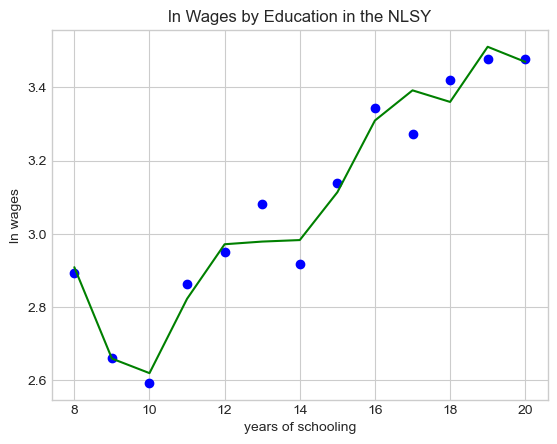

In [17]:
# plot predicted values
lnwbar=nlsy.groupby('educ')['lnw_2016'].mean()
Xbar=pd.DataFrame({'educ':lnwbar.index.values})
powerlist=[Xbar['educ']**j for j in np.arange(1,10)]
Xbar=pd.concat(powerlist,axis=1)
Xbar.columns = X0.columns
ybarhat=reg.predict(Xbar)
fig = plt.figure()
ax = plt.axes()
ax.plot(Xbar['educ1'],lnwbar,'bo',Xbar['educ1'],ybarhat,'g-');
plt.title("ln Wages by Education in the NLSY")
plt.xlabel("years of schooling")
plt.ylabel("ln wages");

Como podemos ver, la regresión lineal de mínimos cuadrados puede aproximar cualquier función continua y ciertamente puede usarse para la predicción. 

Incluyendo un conjunto lo suficientemente rico de transformaciones, las predicciones de OLS producirán estimaciones insesgadas del verdadero predictor ideal: la función de expectativa condicional. Pero estas estimaciones serán bastante ruidosas.